In [24]:
#Import dependencies
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [25]:
iris = load_iris()

In [26]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
#Drop Sepal columns
d = df.drop(['sepal length (cm)', 'sepal width (cm)' ], axis = 'columns')
d.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [29]:
len(d)

150

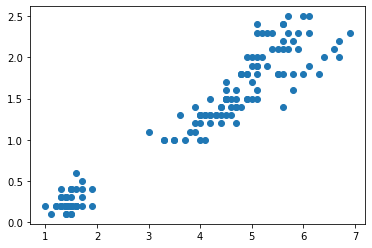

In [30]:
plt.scatter(d['petal length (cm)'], d['petal width (cm)'])

In [31]:
scaler = MinMaxScaler()

scaler.fit(d[['petal length (cm)']])
d['petal length (cm)'] = scaler.transform(d[['petal length (cm)']])

In [32]:
scaler.fit(d[['petal width (cm)']])
d['petal width (cm)'] = scaler.transform(d[['petal width (cm)']])

In [33]:
d.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [34]:
km_rng = range(1, 11)
sse = []

for k in km_rng:
    km = KMeans(n_clusters=k)
    km.fit(d[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

In [35]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1611128497903638,
 0.8535683225340074,
 0.6806539059219305,
 0.5673451458363141,
 0.48580845539143697,
 0.4139407465373423,
 0.3764263356579251]

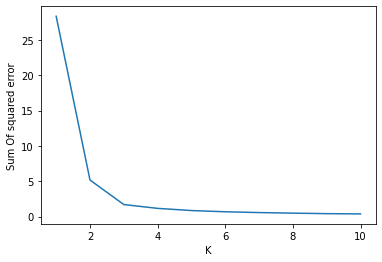

In [36]:
plt.xlabel('K')
plt.ylabel('Sum Of squared error')
plt.plot(km_rng, sse)

In [44]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(d[['petal length (cm)', 'petal width (cm)']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [45]:
d['Cluster'] = y_pred
d.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [46]:
d.tail()

,petal length (cm),petal width (cm),Cluster
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2
149,0.694915,0.708333,2


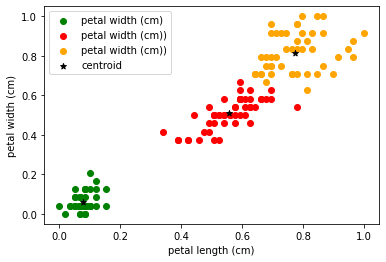

In [48]:
df0 = d[d.Cluster==0]
df1 = d[d.Cluster==1]
df2 = d[d.Cluster==2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', label = 'petal width (cm)')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', label = 'petal width (cm))')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='orange', label = 'petal width (cm))')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label = 'centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()